# Importing Packages

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [2]:
dataset = pd.read_csv('possum.csv')

dataset.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Dataset info

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


# Null values & Duplicates

In [4]:
dataset.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [5]:
dataset.dropna(inplace = True)
dataset.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [6]:
dataset[dataset.duplicated()]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


# Label encoding

In [7]:
nums = [column for column in dataset.columns if dataset[column].dtype == 'float64']
nums

['age',
 'hdlngth',
 'skullw',
 'totlngth',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly']

In [8]:
cats = [column for column in dataset.columns if dataset[column].dtype == 'object' or dataset[column].dtype == 'int64']
cats

['case', 'site', 'Pop', 'sex']

In [9]:
print("Unique values for Pop:",dataset['Pop'].unique())
print('Unique values for Sex:',dataset['sex'].unique())

Unique values for Pop: ['Vic' 'other']
Unique values for Sex: ['m' 'f']


In [10]:
encoder = LabelEncoder()
for column in ['Pop',"sex"]:
    dataset[column] = encoder.fit_transform(dataset[column])

print("Unique values for Pop:",dataset['Pop'].unique())
print('Unique values for Sex:',dataset['sex'].unique())

Unique values for Pop: [0 1]
Unique values for Sex: [1 0]


# Dataset Describe

In [11]:
dataset.describe()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,52.762376,3.673267,0.574257,0.584158,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,30.573894,2.366892,0.496921,0.495325,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,0.000000,0.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,26.000000,1.000000,0.000000,0.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,54.000000,4.000000,1.000000,1.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,79.000000,6.000000,1.000000,1.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,104.000000,7.000000,1.000000,1.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


# Correlation Check

<AxesSubplot:>

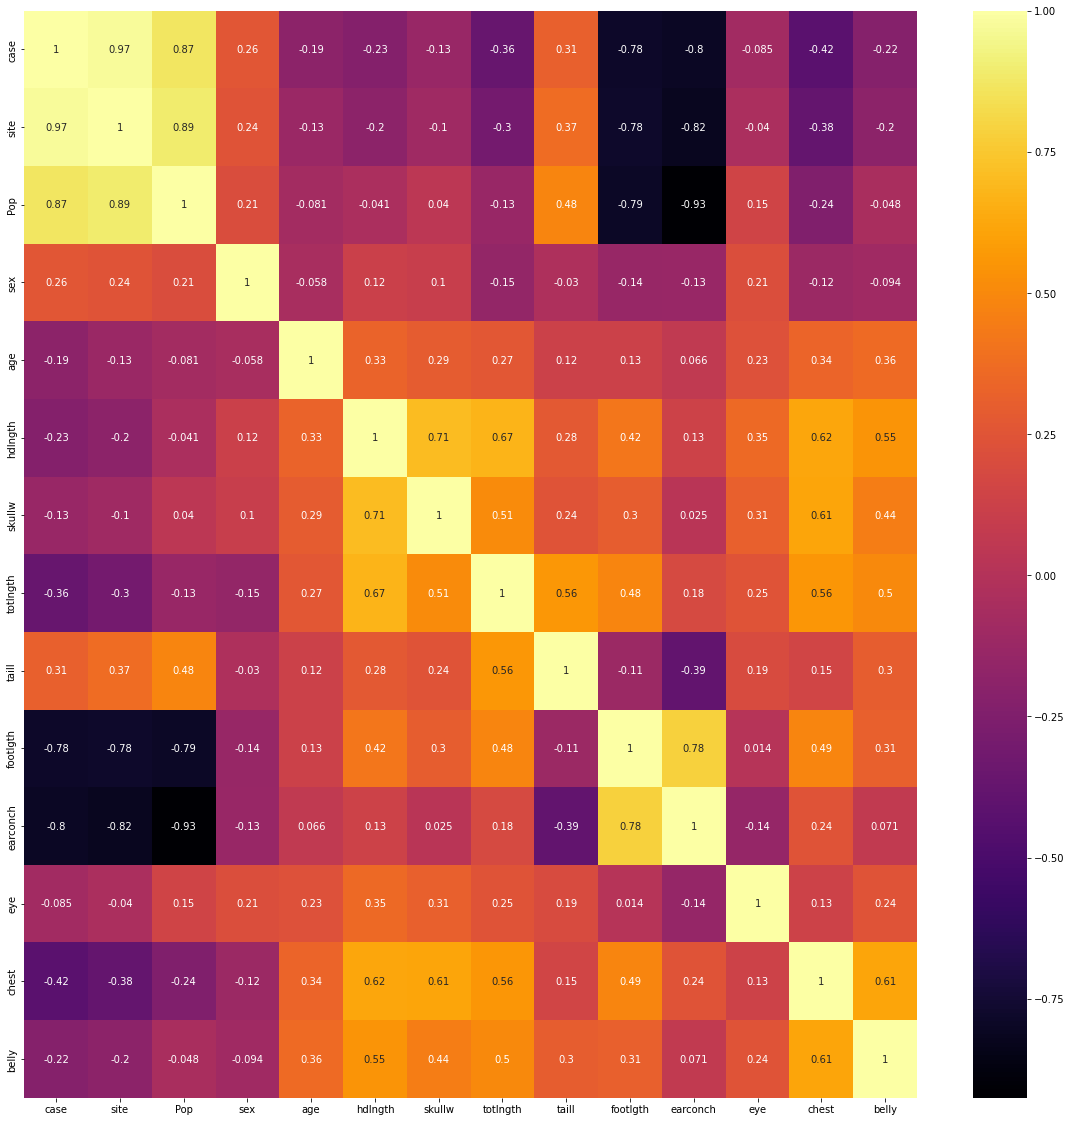

In [12]:
plt.subplots(figsize = (20, 20))
sns.heatmap(dataset.corr(), annot = True, cmap="inferno")

# Check Distributions

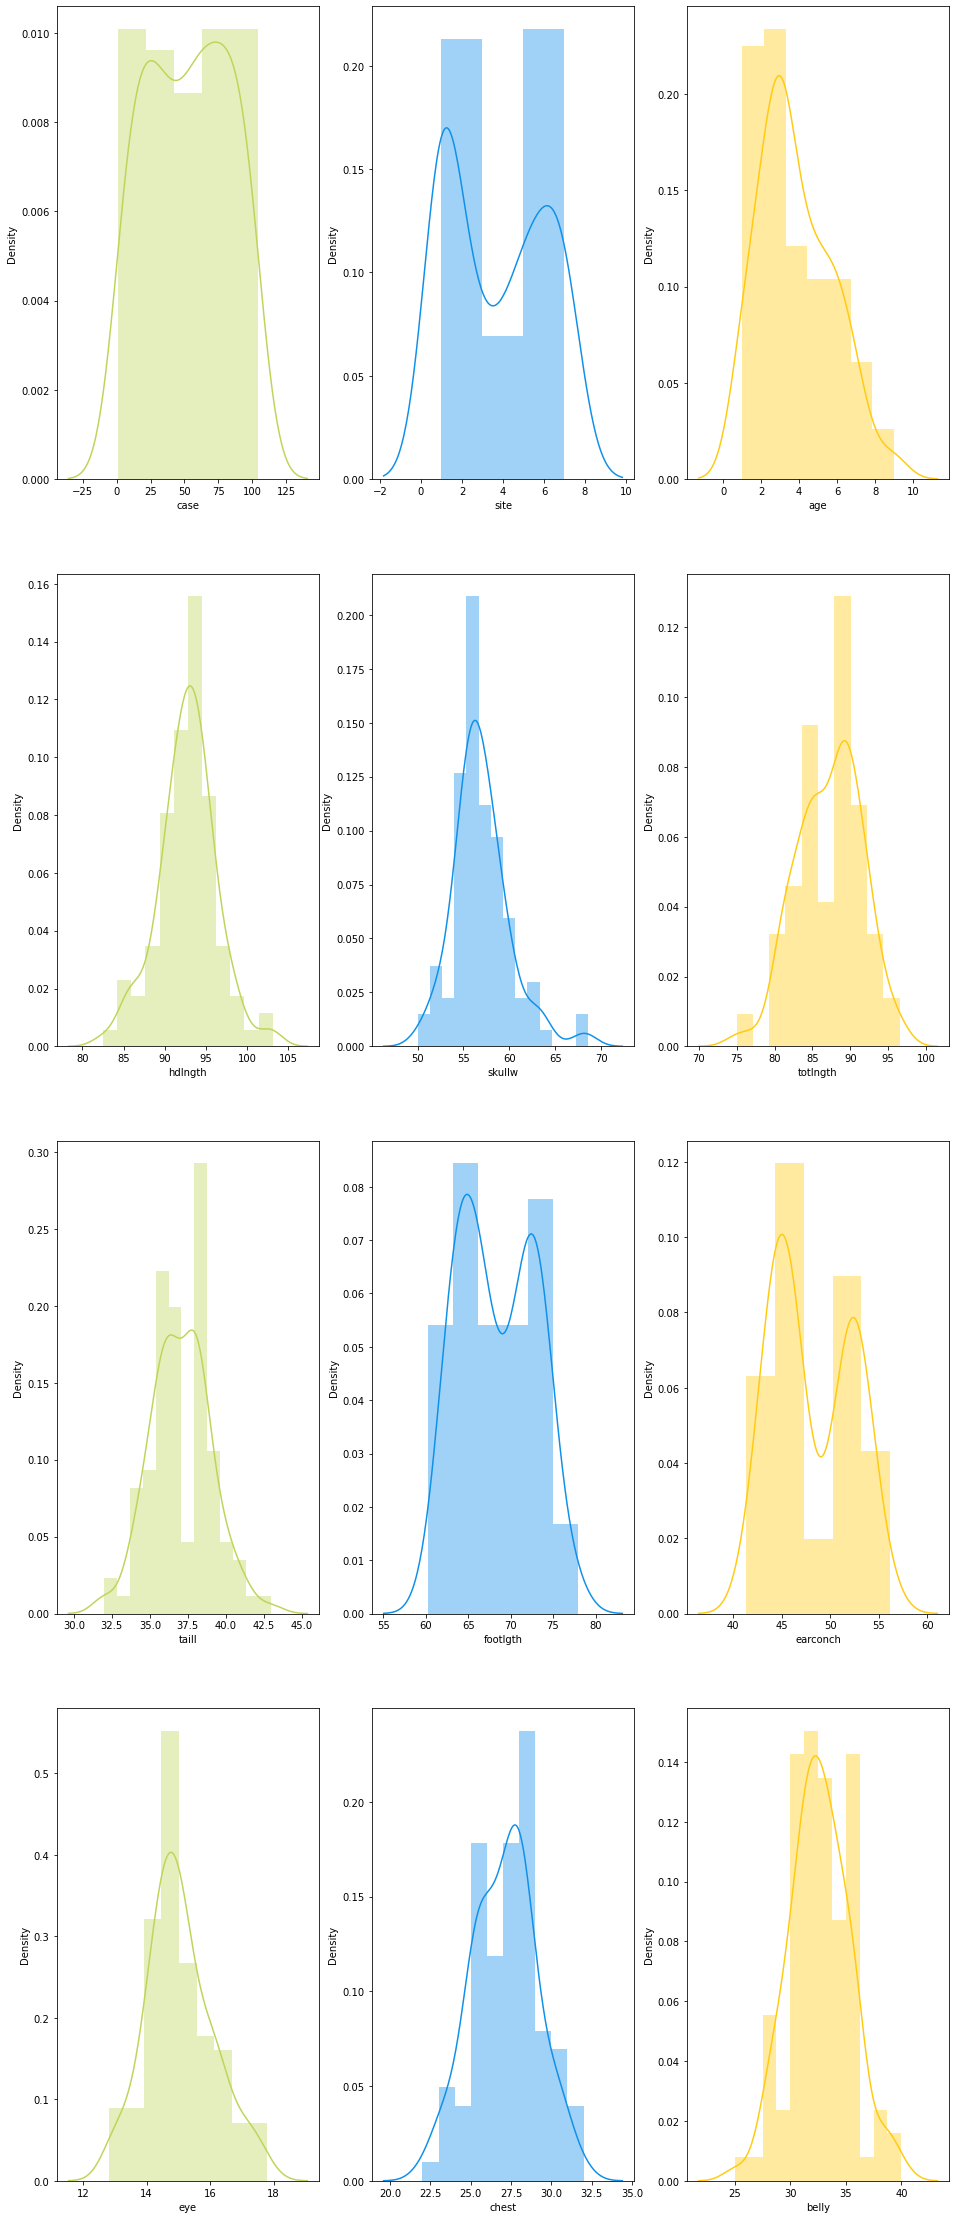

In [23]:
nums = [column for column in dataset.columns if dataset[column].max() > 1 or dataset[column].min()<0]
colors = ["#bed55a", "#0f90e9", "#ffcb12"]
ncols = len(colors)

fig, axs = plt.subplots(nrows = len(nums)//ncols, ncols = ncols, figsize = (16,40))
for i, column in enumerate(nums):
    sns.distplot(dataset[column], ax = axs[i//ncols][i%ncols], color=colors[i%ncols])

# Select x and y variables

In [24]:
X = dataset.drop('sex', axis='columns')
y = dataset.sex

# Scaling the Data

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Removing multicollinearity

<AxesSubplot:>

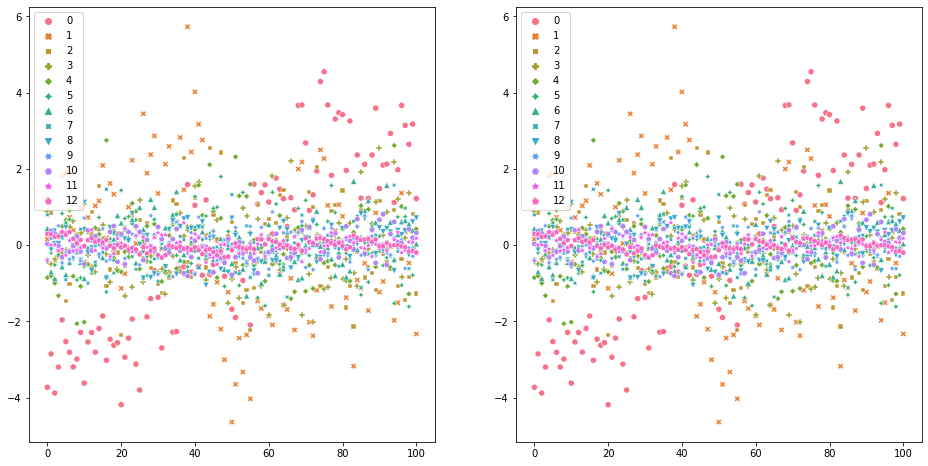

In [34]:
pca = PCA()

fig, axs = plt.subplots(figsize = (16, 8), ncols=2)
sns.scatterplot(data=X, ax=axs[0])
X = pca.fit_transform(X)
sns.scatterplot(data=X, ax=axs[1])
#sns.heatmap(pd.DataFrame(X).corr(), annot = True, cmap="inferno")

# Shuffle the data and train model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 1, stratify = y)

print("----------------------------------------------Logistic Regression-------------------------------------------------------")
logreg = LogisticRegression(penalty = 'none').fit(X_train, y_train)
print(classification_report(y_test, logreg.predict(X_test)))
print("Confusion matrix:\n", confusion_matrix(y_test, logreg.predict(X_test)))

print("----------------------------------------------Decision tree classifier--------------------------------------------------")
tree = DecisionTreeClassifier().fit(X_train, y_train)
print(classification_report(y_test, tree.predict(X_test)))
print("Confusion matrix:\n", confusion_matrix(y_test, tree.predict(X_test)))

print("----------------------------------------------XGBClassifier-------------------------------------------------------------")
xgbc = XGBClassifier(eval_metric='mlogloss').fit(X_train, y_train)
print(classification_report(y_test, xgbc.predict(X_test)))
print("Confusion matrix:\n", confusion_matrix(y_test, xgbc.predict(X_test)))

----------------------------------------------Logistic Regression-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.71      0.83      0.77         6

    accuracy                           0.73        11
   macro avg       0.73      0.72      0.72        11
weighted avg       0.73      0.73      0.72        11

Confusion matrix:
 [[3 2]
 [1 5]]
----------------------------------------------Decision tree classifier--------------------------------------------------
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.50      0.50      0.50         6

    accuracy                           0.45        11
   macro avg       0.45      0.45      0.45        11
weighted avg       0.45      0.45      0.45        11

Confusion matrix:
 [[2 3]
 [3 3]]
------------------------------------